# ビュフォンの針による円周率の計算

KS検定のp値が小さい針のデータは利用しない。

In [1]:
import pandas as pd
from scipy import stats
import math


file_list = [
    'computer/3/buffons_needle.log',
    'computer/5/buffons_needle_2.log',
    'computer/6/buffons_needle_3.log',
    'computer/7/buffons_needle_4.log',
    'computer/8/buffons_needle_5.log',
    'computer/14/buffons_needle_6.log',
    'computer/15/buffons_needle_7.log',
    'computer/16/buffons_needle_8.log',
    'computer/17/buffons_needle_9.log',
    'computer/18/buffons_needle_10.log',
    'computer/19/buffons_needle_11.log',
    'computer/20/buffons_needle_12.log',
    'computer/21/buffons_needle_13.log',

    'log_history/20231209_1137/3/buffons_needle.log',
    'log_history/20231209_1137/7/buffons_needle_4.log',
    'log_history/20231209_1137/8/buffons_needle_5.log',
    'log_history/20231209_1137/15/buffons_needle_7.log',
    'log_history/20231209_1137/16/buffons_needle_8.log',

    'log_history/20231206_1104/3/buffons_needle.log',
    'log_history/20231206_1104/5/buffons_needle_2.log',
    'log_history/20231206_1104/6/buffons_needle_3.log',
    'log_history/20231206_1104/7/buffons_needle_4.log',
    'log_history/20231206_1104/8/buffons_needle_5.log',
    'log_history/20231206_1104/17/buffons_needle_9.log',
    'log_history/20231206_1104/18/buffons_needle_10.log',
    'log_history/20231206_1104/19/buffons_needle_11.log',
    'log_history/20231206_1104/20/buffons_needle_12.log',
    'log_history/20231206_1104/21/buffons_needle_13.log',
    
    'log_history/20231206_0001/3/buffons_needle.log',
    'log_history/20231206_0001/5/buffons_needle_2.log',
    'log_history/20231206_0001/6/buffons_needle_3.log',
    'log_history/20231206_0001/7/buffons_needle_4.log',
    'log_history/20231206_0001/8/buffons_needle_5.log',
    'log_history/20231206_0001/17/buffons_needle_9.log',
    'log_history/20231206_0001/18/buffons_needle_10.log',
    'log_history/20231206_0001/19/buffons_needle_11.log',
    'log_history/20231206_0001/20/buffons_needle_12.log',
    'log_history/20231206_0001/21/buffons_needle_13.log',
    
    'log_history/20231205_1820/3/buffons_needle.log',
    'log_history/20231205_1820/5/buffons_needle_2.log',
    'log_history/20231205_1820/6/buffons_needle_3.log',
    'log_history/20231205_1820/7/buffons_needle_4.log',
    'log_history/20231205_1820/8/buffons_needle_5.log',
    'log_history/20231205_1820/14/buffons_needle_6.log',
    'log_history/20231205_1820/15/buffons_needle_7.log',
    'log_history/20231205_1820/16/buffons_needle_8.log',
    'log_history/20231205_1820/17/buffons_needle_9.log',
    'log_history/20231205_1820/18/buffons_needle_10.log',
    'log_history/20231205_1820/19/buffons_needle_11.log',
    'log_history/20231205_1820/20/buffons_needle_12.log',
    'log_history/20231205_1820/21/buffons_needle_13.log',

    'log_history/20231204_1506/buffons_needle.log',
    'log_history/20231204_1506/buffons_needle_2.log',
    'log_history/20231204_1506/buffons_needle_3.log',
    'log_history/20231204_1506/buffons_needle_4.log',
    'log_history/20231204_1506/buffons_needle_5.log',
]


def preprocess_data(df):
    df = df[(df['ship_yaw'] >= -0.01) & (df['ship_yaw'] <= 0.01) 
        & (df['ship_pitch'] >= -0.01) & (df['ship_pitch'] <= 0.01)].copy()
    df['diff_x'] = df['ship_x'] - df['origin_x']
    df = df[(df['diff_x'] >= -6) & (df['diff_x'] <= 6)]
    return df


merged_df = pd.DataFrame()
for i, file in enumerate(file_list):
    df = pd.read_csv(file)
    df = preprocess_data(df)

    _, diff_x_p_value = stats.kstest(df['diff_x'], 'uniform', args=(-6, 12))
    _, ship_roll_p_value = stats.kstest(df['ship_roll'], 'uniform', args=(-math.pi, 2 * math.pi))

    randomness = "NG"
    if diff_x_p_value >= 0.5 and ship_roll_p_value >= 0.5:
        merged_df = pd.concat([merged_df, df])
        randomness = "OK"

    print(f"{randomness} #{i+1} diff_x_p_value: {diff_x_p_value:.3} " + 
          f"ship_roll_p_value: {ship_roll_p_value:.3} file:{file}")

merged_df.to_csv('merged_logs.csv', index=False)

merged_df = merged_df.sample(frac=1, random_state=1234)

NG #1 diff_x_p_value: 0.0598 ship_roll_p_value: 0.533 file:computer/3/buffons_needle.log
NG #2 diff_x_p_value: 0.429 ship_roll_p_value: 0.456 file:computer/5/buffons_needle_2.log
NG #3 diff_x_p_value: 0.859 ship_roll_p_value: 0.4 file:computer/6/buffons_needle_3.log
NG #4 diff_x_p_value: 0.0975 ship_roll_p_value: 0.234 file:computer/7/buffons_needle_4.log
OK #5 diff_x_p_value: 0.976 ship_roll_p_value: 0.548 file:computer/8/buffons_needle_5.log
OK #6 diff_x_p_value: 0.7 ship_roll_p_value: 0.904 file:computer/14/buffons_needle_6.log
OK #7 diff_x_p_value: 0.613 ship_roll_p_value: 0.921 file:computer/15/buffons_needle_7.log
OK #8 diff_x_p_value: 0.803 ship_roll_p_value: 0.558 file:computer/16/buffons_needle_8.log
OK #9 diff_x_p_value: 0.673 ship_roll_p_value: 0.515 file:computer/17/buffons_needle_9.log
NG #10 diff_x_p_value: 0.398 ship_roll_p_value: 0.682 file:computer/18/buffons_needle_10.log
NG #11 diff_x_p_value: 0.741 ship_roll_p_value: 0.324 file:computer/19/buffons_needle_11.log
NG #

In [2]:
!wc -l merged_logs.csv

   37717 merged_logs.csv


In [3]:
merged_df.to_csv('merged_logs_20231209_1355.csv', index=False)

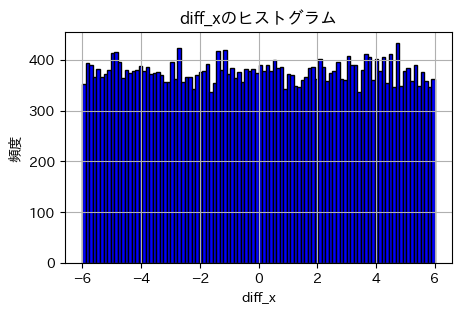

(0.0033138205277685184, 0.8006009804672571)

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy.stats as stats


plt.figure(figsize=(5, 3))
plt.hist(merged_df['diff_x'], bins=100, color='blue', edgecolor='black')
plt.title('diff_xのヒストグラム')
plt.xlabel('diff_x')
plt.ylabel('頻度')
plt.grid(True)
plt.show()

ks_statistic, p_value = stats.kstest(merged_df['diff_x'], 'uniform', args=(-6, 12))
ks_statistic, p_value

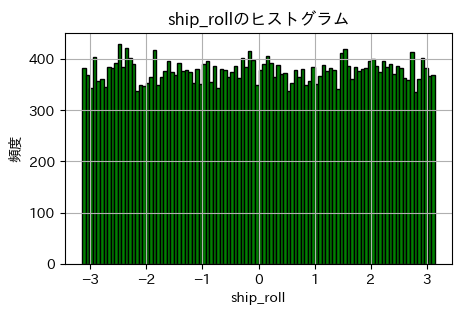

(0.003953521299019491, 0.5958746620182358)

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy.stats as stats
import math


plt.figure(figsize=(5, 3))
plt.hist(merged_df['ship_roll'], bins=100, color='green', edgecolor='black')
plt.title('ship_rollのヒストグラム')
plt.xlabel('ship_roll')
plt.ylabel('頻度')
plt.grid(True)
plt.show()

ks_statistic, p_value = stats.kstest(merged_df['ship_roll'], 'uniform', args=(-math.pi, 2 * math.pi))
ks_statistic, p_value

In [6]:
import pandas as pd
import math


total_records = len(merged_df)

crossed_records = ((merged_df['diff_x'] + 3 * merged_df['ship_roll'].apply(math.sin)) * 
                       (merged_df['diff_x'] - 3 * merged_df['ship_roll'].apply(math.sin))) <= 0
crossed_count = crossed_records.sum()

print(f"Total number of records: {total_records}")
print(f"Number of records satisfying the condition: {crossed_count}")
print(f"pi: {total_records / crossed_count}")


Total number of records: 37716
Number of records satisfying the condition: 11995
pi: 3.1443101292205085


# 収束状況の可視化

In [7]:
total_count = 0
crossed_count = 0

merged_df['pi_1'] = None
merged_df['pi_2'] = None
merged_df['pi_3'] = None

pi_column_index = merged_df.columns.get_loc('pi')
pi_1_column_index = merged_df.columns.get_loc('pi_1')
pi_2_column_index = merged_df.columns.get_loc('pi_2')
pi_3_column_index = merged_df.columns.get_loc('pi_3')

for i, (_, row) in enumerate(merged_df.iterrows()):
    # print(index, row)
    # break
    
    total_count += 1
    if ((row['diff_x'] + 3 * math.sin(row['ship_roll'])) * 
         (row['diff_x'] - 3 * math.sin(row['ship_roll']))) <= 0:
        crossed_count += 1
        
    if crossed_count == 0:
        pi_approx = 0
    else:
        pi_approx = total_count / crossed_count

    merged_df.iat[i, pi_column_index] = pi_approx
    
    pi_str = f"{pi_approx:0.02f}"
    dot_position = pi_str.find('.')
    merged_df.iat[i, pi_1_column_index] = int(pi_str[dot_position - 1])
    merged_df.iat[i, pi_2_column_index] = int(pi_str[dot_position + 1])
    merged_df.iat[i, pi_3_column_index] = int(pi_str[dot_position + 2])


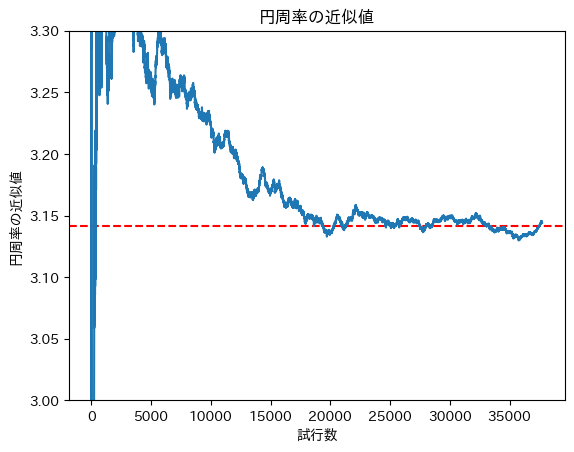

In [8]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import math


plt.axhline(y=math.pi, color='r', linestyle='--')
# plt.scatter(range(len(merged_df)), merged_df['pi'], s=0.5)
plt.plot(range(len(merged_df)), merged_df['pi'])
plt.xlabel('試行数')
plt.ylabel('円周率の近似値')
plt.title('円周率の近似値')
plt.ylim(3, 3.3)
plt.show()

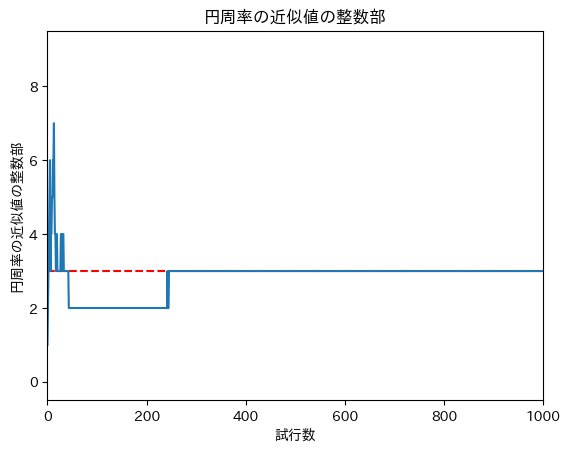

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


plt.axhline(y=3, color='r', linestyle='--')
# plt.scatter(range(len(merged_df)), merged_df['pi_1'], s=5)
plt.plot(range(len(merged_df)), merged_df['pi_1'])
plt.xlabel('試行数')
plt.ylabel('円周率の近似値の整数部')
plt.title('円周率の近似値の整数部')
plt.ylim(-0.5, 9.5)
plt.xlim(0, 1000)
plt.show()

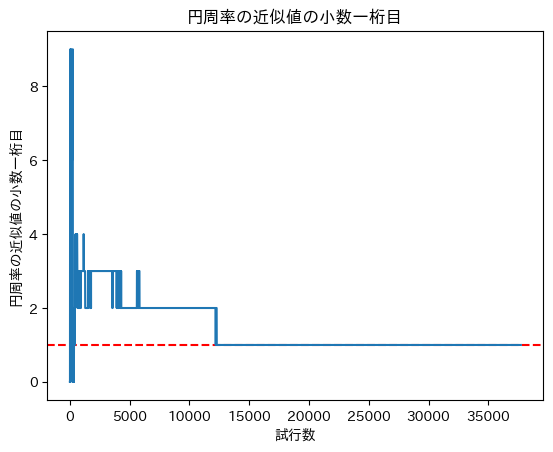

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


plt.axhline(y=1, color='r', linestyle='--')
# plt.scatter(range(len(merged_df)), merged_df['pi_2'], s=5)
plt.plot(range(len(merged_df)), merged_df['pi_2'])
plt.xlabel('試行数')
plt.ylabel('円周率の近似値の小数一桁目')
plt.title('円周率の近似値の小数一桁目')
plt.ylim(-0.5, 9.5)
plt.show()

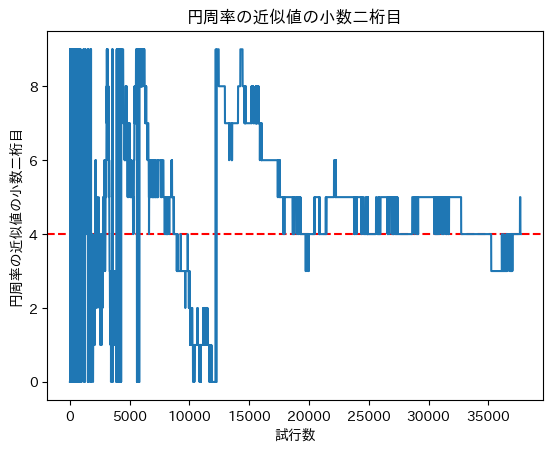

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


plt.axhline(y=4, color='r', linestyle='--')
# plt.scatter(range(len(merged_df)), merged_df['pi_3'], s=5)
plt.plot(range(len(merged_df)), merged_df['pi_3'])
plt.xlabel('試行数')
plt.ylabel('円周率の近似値の小数二桁目')
plt.title('円周率の近似値の小数二桁目')
plt.ylim(-0.5, 9.5)
plt.show()